In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
%matplotlib inline
import os
import warnings
import glob
warnings.filterwarnings('ignore')

from kmodes.kmodes import KModes


In [100]:
df = pd.read_csv('노인실태조사_전처리1.csv')
df.shape

(7846, 5)

In [101]:
df.isna().sum()

Gender    0
Job       0
Edu       0
Health    0
Earn      0
dtype: int64

In [87]:
df.drop('Self_conf',axis = 1, inplace = True)

In [7]:
result = df.copy()
result['Gender'] = np.where(result['Gender'] == '남성', 0, 1)
result['Job']  = np.where(result['Job'] == '비경활', 0,
                np.where(result['Job'].isin(['은퇴','부분은퇴']), 1,
                        np.where(result['Job'] == '임금_고숙련', 4,
                            np.where(result['Job'] == '임금_중숙련', 3,
                                np.where(result['Job'] == '임금_저숙련', 2,
                                    np.where(result['Job'] == '자영업', 5, 6))))))
result['Edu'] = np.where(result['Edu'] == '초등', 0,
                np.where(result['Edu'] == '중등', 1,
                    np.where(result['Edu'] == '고등', 2, 3)))
result['Health'] = np.where(result['Health'] == '활동에 제한 있음', 0,
                    np.where(result['Health'] == '그렇지 않은 편', 1, 2))
result['Earn'] = np.where(result['Earn'] == '하', 0,
                np.where(result['Earn'] == '중', 1, 2))
# data['Self_conf'] = np.where(data['Self_conf'] == '하', 0,
#                         np.where(data['Self_conf'] == '중', 1, 2))

In [81]:
df[df['Edu']=='대학교 이상'].Earn.value_counts()

상    94
중    85
하    58
Name: Earn, dtype: int64

In [5]:
!pip install KModes

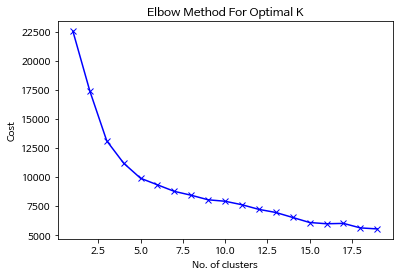

In [106]:
K = range(1, 20)
cost = []
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = 'random', random_state=2022)
    kmode.fit_predict(df.drop(['Gender'], axis=1))
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal K')
plt.show()

In [107]:
kmode = KModes(n_clusters=4, init='random', random_state=2022)
kmode.fit_predict(df.drop(['Gender'], axis=1))
df['Cluster'] = kmode.labels_

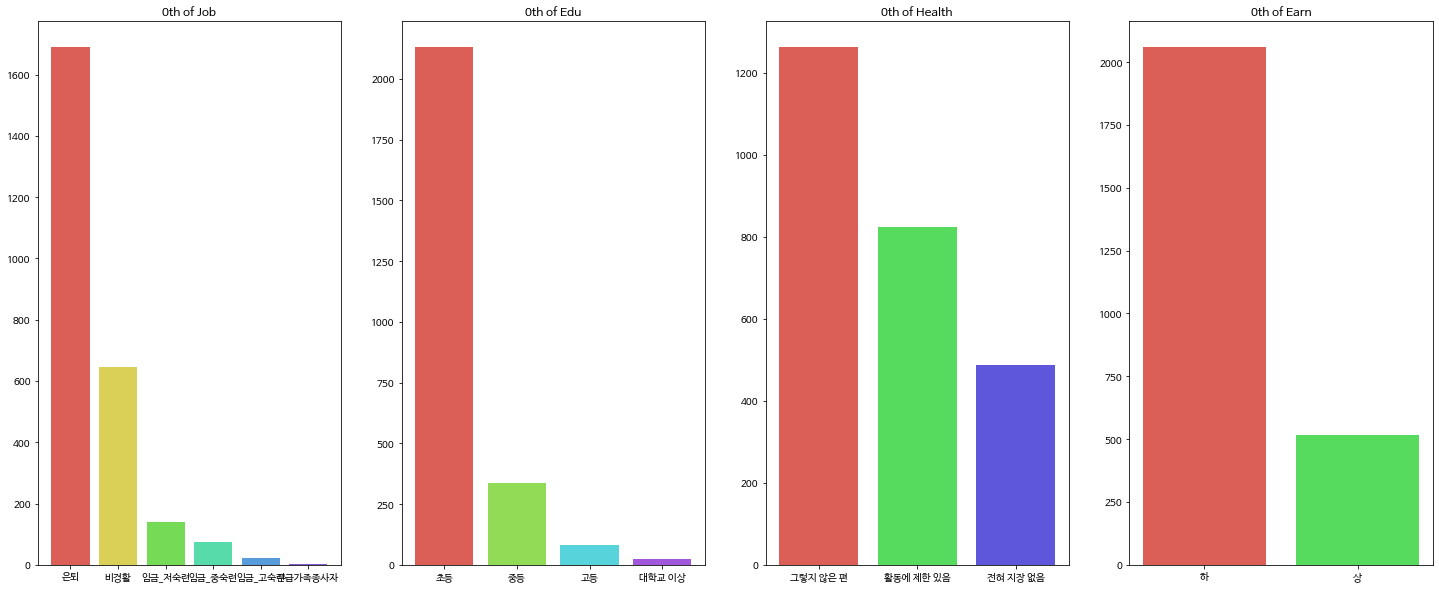

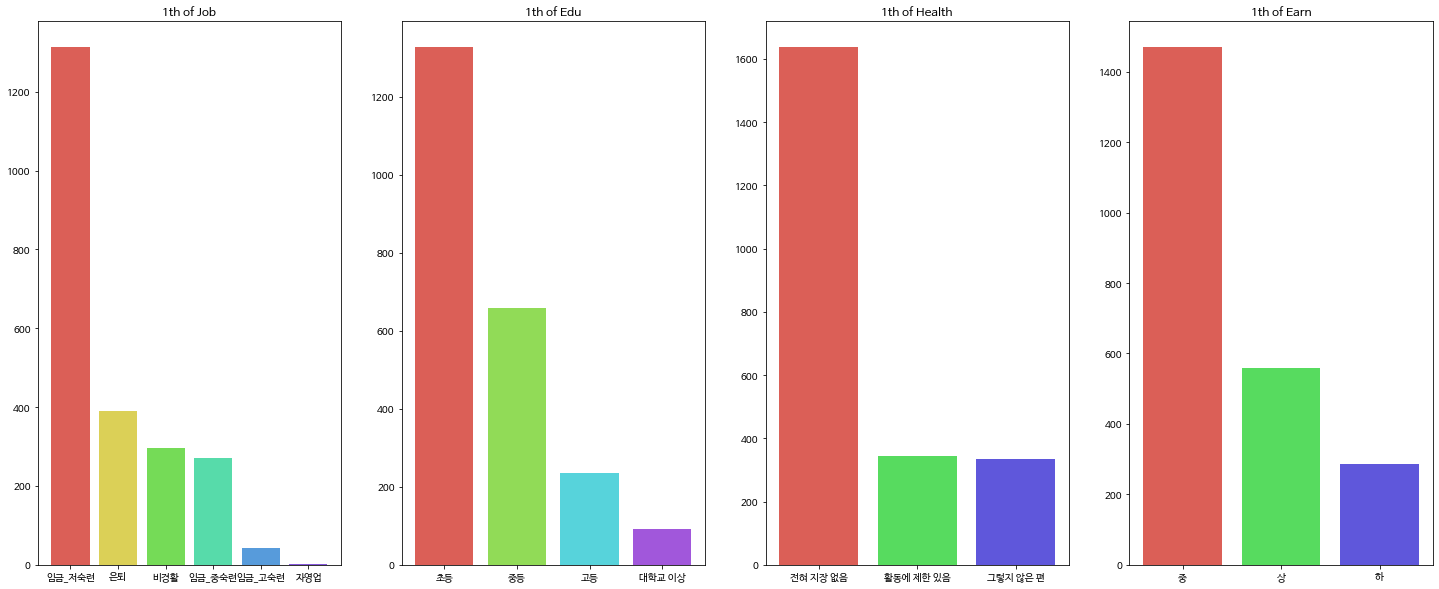

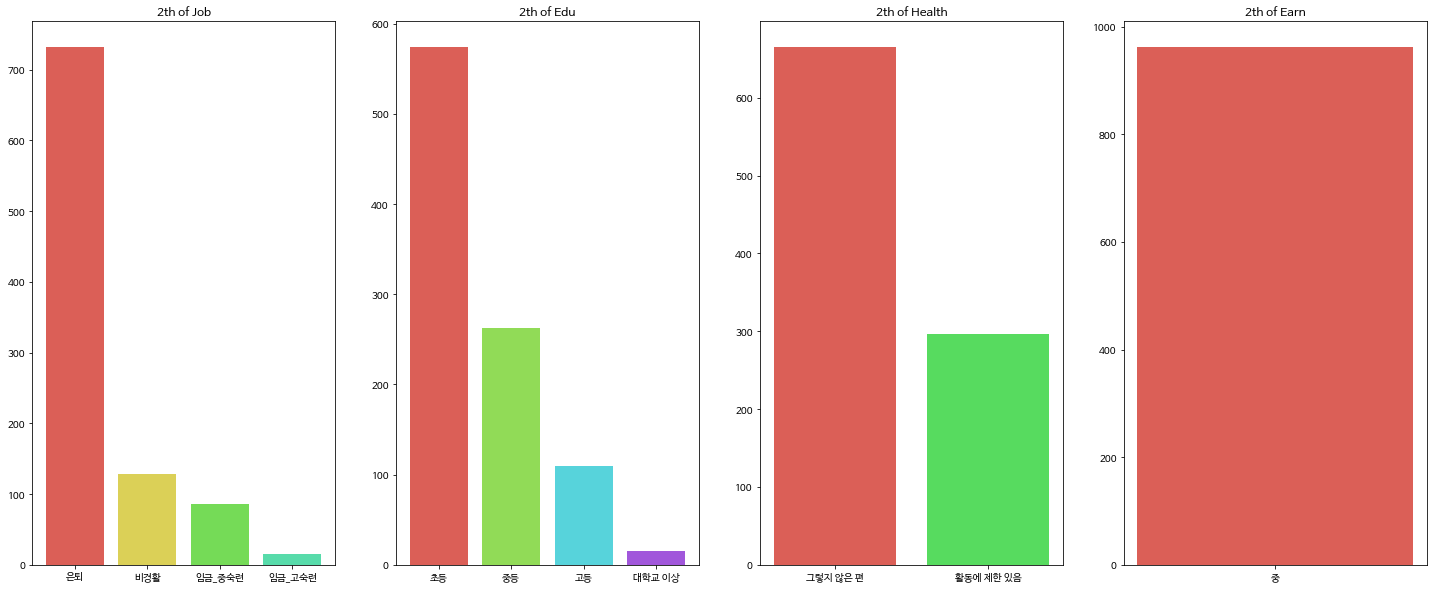

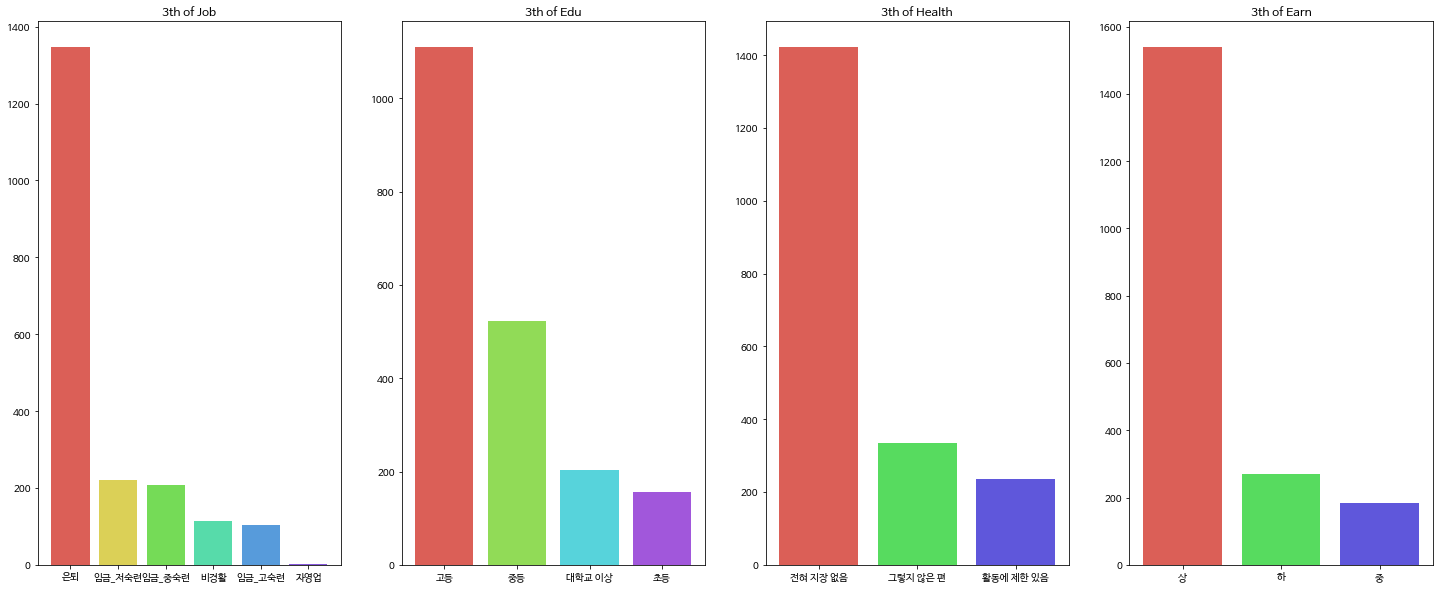

In [108]:
cols = df.drop(['Gender','Cluster'], axis=1).columns
for clus in range(0, 4):
    plt.figure(figsize=(25, 10))
    n = 1 
    for i, col in enumerate(cols):
        ax = plt.subplot(1, 4, n)
        colors = sns.color_palette('hls',len(df[col].value_counts()))
        temp = df[df['Cluster'] == clus].drop(['Cluster'], axis=1)[col].value_counts()
        ax.bar(x = temp.index, height= temp.values, color = colors, axes= ax)
        plt.title(f'{clus}th of {col}')
        n += 1
    plt.show()